In [36]:
'''
This code is used to process the summer data in 2021，by person
'''
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [59]:
def corr(df,name):

    # 读取2021年夏季数据并并查看相关性
    result = df.corr()
    print(name + "数据集中各参数与热投票值之间的相关性分析如下：")
    result1 = df.corr()['thermal sensation'].sort_values()
    print(result1)


    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文
    plt.rcParams['axes.unicode_minus'] = False
    plt.subplots(figsize=(16, 16)) # 设置画面大小
    sns.heatmap(result, annot=True, vmax=1, square=True, cmap="Blues")
    plt.savefig('./相关系数热力图.png')
    plt.show()


    # 选取相关性最强的6个
    most_correlated = df.corr().abs()['thermal sensation'].sort_values(ascending=False)
    most_correlated = most_correlated[:7]
    print(name + "数据集中与热舒适投票相关性最强5个参数：")
    print(most_correlated)



2021年全年数据集中各参数与热投票值之间的相关性分析如下：
thermal preference(-1:c,0:not change,1:w)   -0.338135
thermal comfort (1:com,0:uncom)             -0.321680
sensitivity(0:in 1:slight 2:very)           -0.051026
humid                                       -0.025801
no                                          -0.003981
height(cm)                                   0.014006
gender(female:0,male:1)                      0.015719
age                                          0.023138
preference(-1:cool 0:n 1:warm)               0.026226
weight(Kg)                                   0.033274
bmi                                          0.038930
environment assess(-1:c 0:n 1:w)             0.116037
room                                         0.137746
temp                                         0.561328
thermal sensation                            1.000000
Name: thermal sensation, dtype: float64


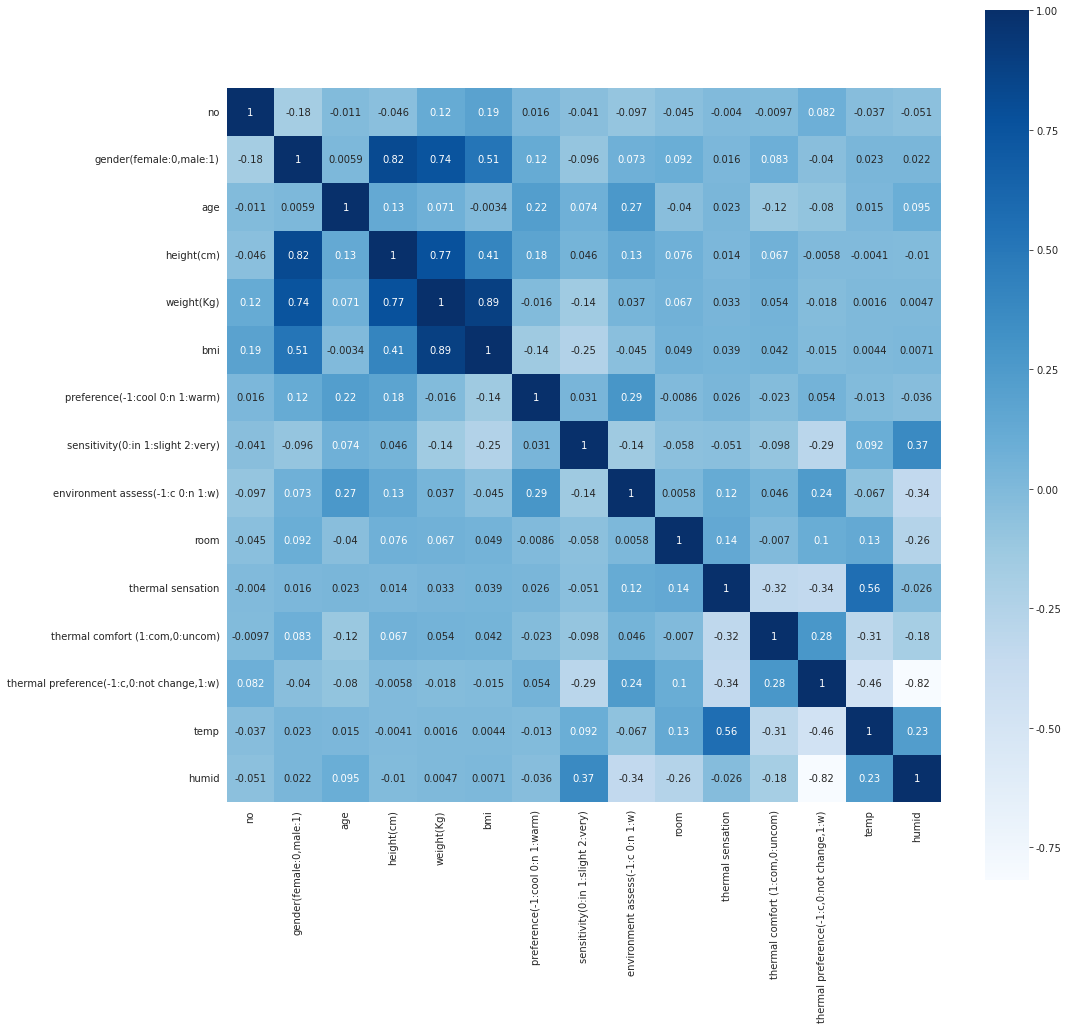

2021年全年数据集中与热舒适投票相关性最强5个参数：
thermal sensation                            1.000000
temp                                         0.561328
thermal preference(-1:c,0:not change,1:w)    0.338135
thermal comfort (1:com,0:uncom)              0.321680
room                                         0.137746
environment assess(-1:c 0:n 1:w)             0.116037
sensitivity(0:in 1:slight 2:very)            0.051026
Name: thermal sensation, dtype: float64


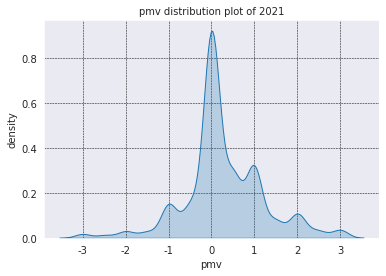

全年pmv均值为：0.2678433393455295
不符合正态分布


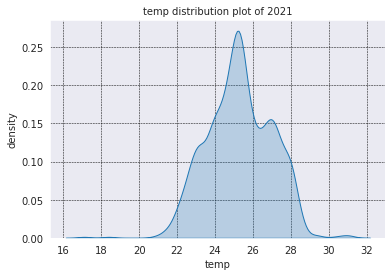

全年温度均值为：25.279979386755993
不符合正态分布


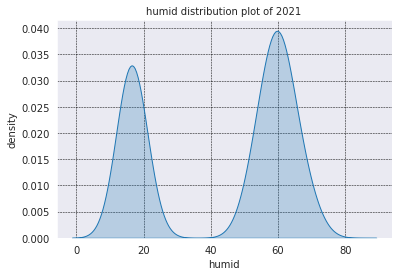

全年湿度均值为：43.27490337541871
不符合正态分布


In [60]:
# 读取2021年所有数据
df = pd.read_csv('../../dataset/merge/2021_dateset.csv',encoding="utf-8")
df.dropna(axis=0,how='any')
# 查看各参数与热舒适投票之间的相关性
corr(df,'2021年全年')
# 查看PMV分布
pmv_distribution = sns.kdeplot(df['thermal sensation'], shade=True)
pmv_distribution.axes.set_title('pmv distribution plot of 2021', fontsize=10)
pmv_distribution.set_xlabel('pmv', fontsize=10)
pmv_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/all/pmv distribution plot of 2021',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断PMV是否符合正态分布
u = df['thermal sensation'].mean() # 计算均值
print('全年pmv均值为：' + str(u))
std = df['thermal sensation'].std() # 计算标准差
result = stats.kstest(df['thermal sensation'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")

# 查看2021年全年温度分布
temp_distribution = sns.kdeplot(df['temp'], shade=True)
temp_distribution.axes.set_title('temp distribution plot of 2021', fontsize=10)
temp_distribution.set_xlabel('temp', fontsize=10)
temp_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/all/temp distribution plot of 2021',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断2021年全年温度是否符合正态分布
u = df['temp'].mean() # 计算均值
print('全年温度均值为：' + str(u))

std = df['temp'].std() # 计算标准差
result = stats.kstest(df['temp'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")

# 查看2021年全年湿度分布
humid_distribution = sns.kdeplot(df['humid'], shade=True)
humid_distribution.axes.set_title('humid distribution plot of 2021', fontsize=10)
humid_distribution.set_xlabel('humid', fontsize=10)
humid_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/all/humid distribution plot of 2021',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断2021年全年湿度是否符合正态分布
u = df['humid'].mean() # 计算均值
print('全年湿度均值为：' + str(u))
std = df['humid'].std() # 计算标准差
result = stats.kstest(df['humid'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")


2021年夏季数据集中各参数与热投票值之间的相关性分析如下：
thermal preference(-1:c,0:not change,1:w)           -0.619321
thermal comfort (1:com,0:uncom                      -0.290355
thermal acceptance(1:a 0:una)                       -0.231941
mood(1:pos,0:neural,1:neg)                          -0.206141
importance of hout(1:vui ~ 5:vi)                    -0.083779
 importance of emotion to tolerance(1:vui ~ 5:vi)   -0.081083
importance of tin(1:vui ~ 5:vi)                     -0.074341
importance of weather(1:vui ~ 5:vi)                 -0.073023
thermal sensitivity(0:in 1:slight 2:very)           -0.064341
importance of air_speed(1:vui ~ 5:vi)               -0.064138
importance of mood(1:vui ~ 5:vi)                    -0.059670
air speed acceptable (1:a 0:una)                    -0.059209
importance of ari_quality(1:vui ~ 5:vi)             -0.046166
importance of tout(1:vui ~ 5:vi)                    -0.035467
humidity sensation                                  -0.033486
no                                     

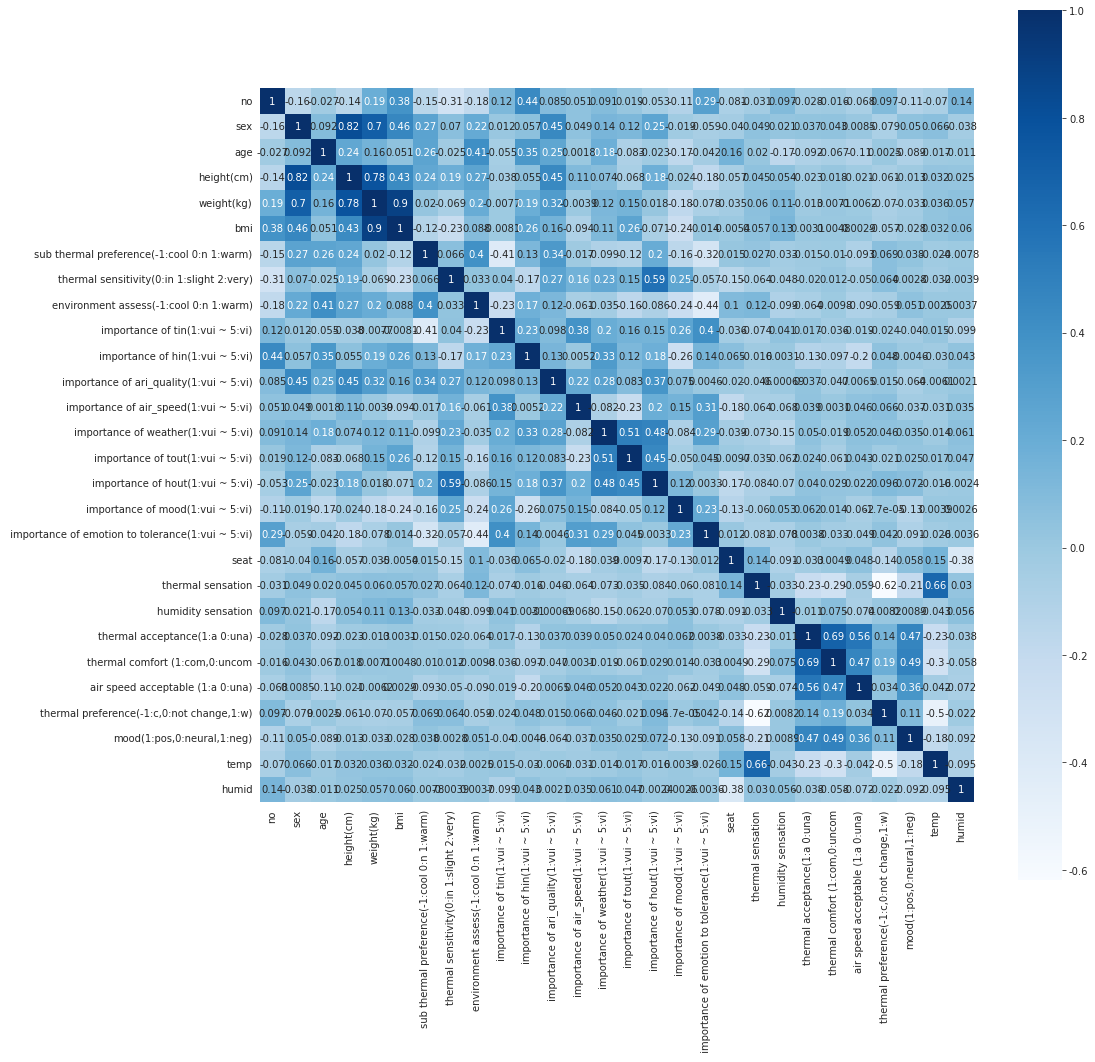

2021年夏季数据集中与热舒适投票相关性最强5个参数：
thermal sensation                            1.000000
temp                                         0.656050
thermal preference(-1:c,0:not change,1:w)    0.619321
thermal comfort (1:com,0:uncom               0.290355
thermal acceptance(1:a 0:una)                0.231941
mood(1:pos,0:neural,1:neg)                   0.206141
seat                                         0.135182
Name: thermal sensation, dtype: float64


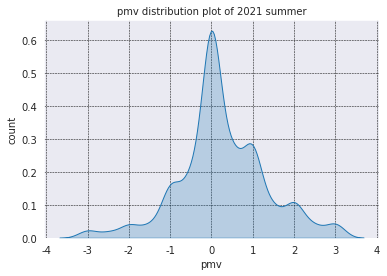

2021年夏天pmv均值为：0.24813729593972372
不符合正态分布


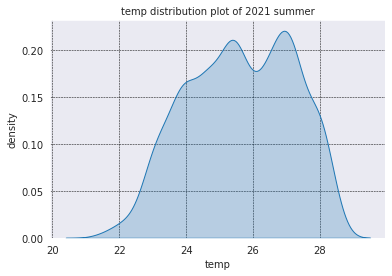

2021年夏天温度均值为：25.623440770196737
不符合正态分布


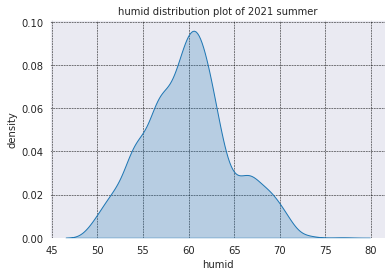

2021年夏天湿度均值为：59.97124319799079
不符合正态分布


In [61]:
# 读取2021年夏季数据并查看PMV分布

df = pd.read_csv('../../dataset/summer/summer_2021_by_person.csv',encoding="gbk")
df.dropna(axis=0,how='any',inplace = True)
# 查看各参数与热舒适投票之间的相关性
corr(df,'2021年夏季')

pmv_distribution = sns.kdeplot(df['thermal sensation'], shade=True)
pmv_distribution.axes.set_title('pmv distribution plot of 2021 summer', fontsize=10)
pmv_distribution.set_xlabel('pmv', fontsize=10)
pmv_distribution.set_ylabel('count', fontsize=10)
plt.savefig('../result/summer/pmv distribution plot of 2021 summer',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断2021年夏天PMV数据是否符合正太分布
u = df['thermal sensation'].mean() # 计算均值
print('2021年夏天pmv均值为：' + str(u))
std = df['thermal sensation'].std() # 计算标准差
result = stats.kstest(df['thermal sensation'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")

# 查看2021年夏季温度分布
temp_distribution = sns.kdeplot(df['temp'], shade=True)
temp_distribution.axes.set_title('temp distribution plot of 2021 summer', fontsize=10)
temp_distribution.set_xlabel('temp', fontsize=10)
temp_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/summer/temp distribution plot of 2021 summer',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断2021年夏季温度是否符合正态分布
u = df['temp'].mean() # 计算均值
print('2021年夏天温度均值为：' + str(u))

std = df['temp'].std() # 计算标准差
result = stats.kstest(df['temp'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")

# 查看2021年夏季湿度分布
humid_distribution = sns.kdeplot(df['humid'], shade=True)
humid_distribution.axes.set_title('humid distribution plot of 2021 summer', fontsize=10)
humid_distribution.set_xlabel('humid', fontsize=10)
humid_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/summer/humid distribution plot of 2021 summer',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断2021年夏季湿度是否符合正态分布
u = df['humid'].mean() # 计算均值
print('2021年夏天湿度均值为：' + str(u))
std = df['humid'].std() # 计算标准差
result = stats.kstest(df['humid'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")


2021年冬季数据集中各参数与热投票值之间的相关性分析如下：
thermal preference (C:1 U:2 W:3)         -0.762817
thermal comfort(com:1 discom:0)          -0.473732
humid                                    -0.158880
height                                   -0.076572
sex(male:1,female:0)                     -0.063075
weight                                   -0.039709
sensitivity                              -0.016222
bmi                                      -0.003804
seat number                               0.021998
preference                                0.023989
age                                       0.057244
no                                        0.063042
 experimental environment                 0.107063
room((meeting:1 reception:2 drinks:3))    0.201955
temp                                      0.495721
thermal sensation                         1.000000
Name: thermal sensation, dtype: float64


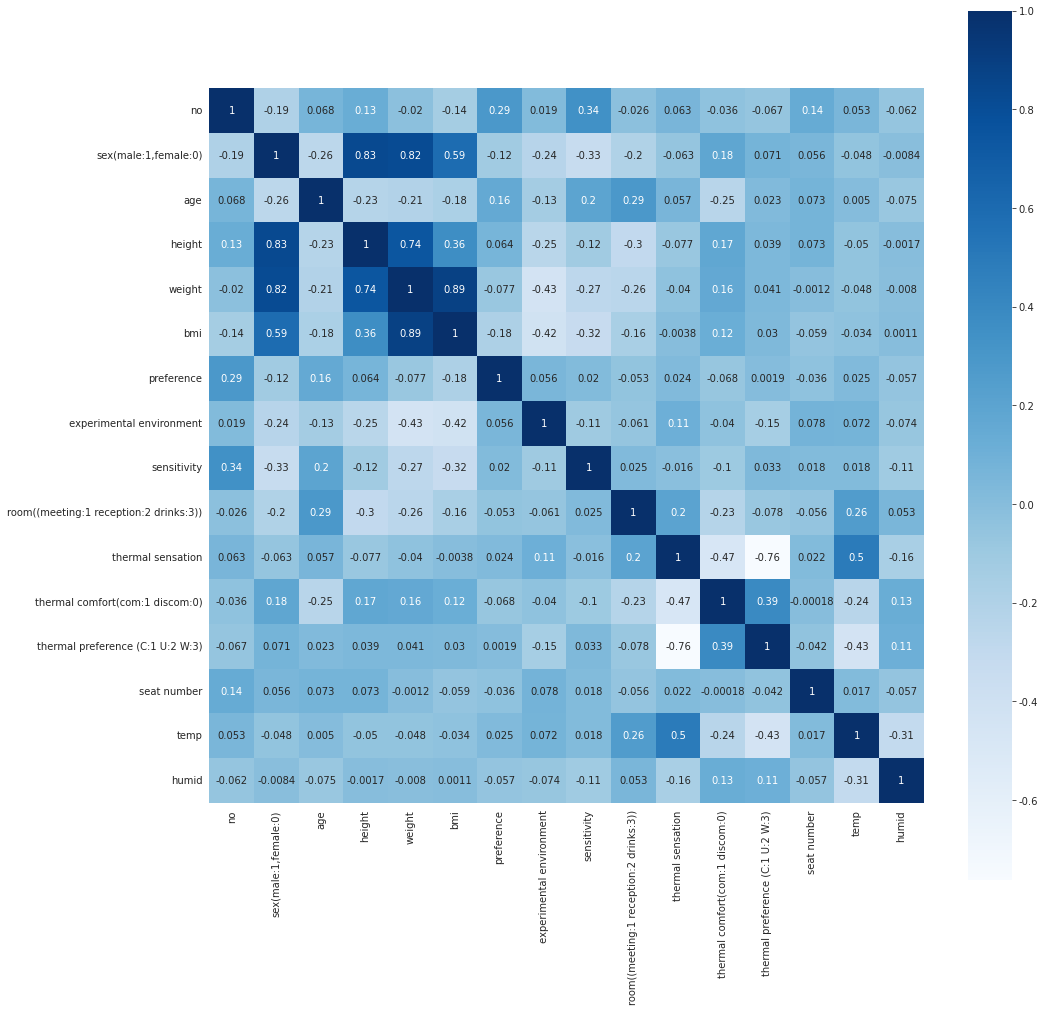

2021年冬季数据集中与热舒适投票相关性最强5个参数：
thermal sensation                         1.000000
thermal preference (C:1 U:2 W:3)          0.762817
temp                                      0.495721
thermal comfort(com:1 discom:0)           0.473732
room((meeting:1 reception:2 drinks:3))    0.201955
humid                                     0.158880
 experimental environment                 0.107063
Name: thermal sensation, dtype: float64


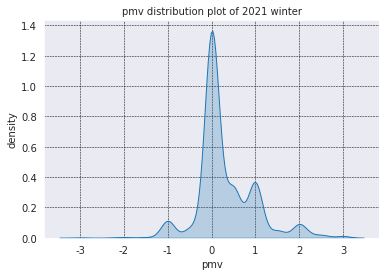

2021年冬季pmv均值为：0.29926470588235293
不符合正态分布


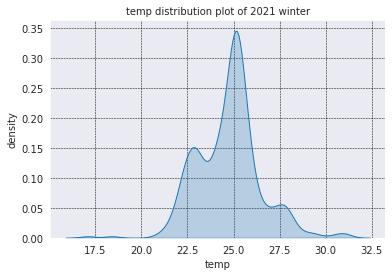

2021年冬季温度均值为：24.727729980145597
不符合正态分布


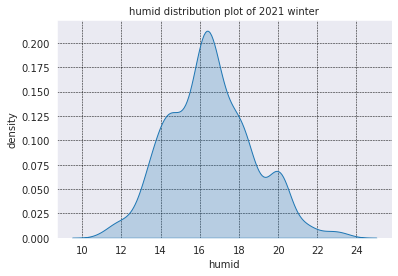

2021年冬季湿度均值为：16.52753143613501
不符合正态分布


In [62]:
# 读取2021年冬季季数据并查看PMV分布
df = pd.read_csv('../../dataset/winter/winter_2021_by_person.csv',encoding="gbk")
df.dropna(axis=0,how='any')
# 查看各参数与热舒适投票之间的相关性
corr(df,'2021年冬季')

pmv_distribution = sns.kdeplot(df['thermal sensation'], shade=True)
pmv_distribution.axes.set_title('pmv distribution plot of 2021 winter', fontsize=10)
pmv_distribution.set_xlabel('pmv', fontsize=10)
pmv_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/winter/pmv distribution plot of 2021 winter',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断2021年冬季PMV数据是否符合正态分布
u = df['thermal sensation'].mean() # 计算均值
print('2021年冬季pmv均值为：' + str(u))
std = df['thermal sensation'].std() # 计算标准差
result = stats.kstest(df['thermal sensation'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")


# 查看2021年冬季温度分布
temp_distribution = sns.kdeplot(df['temp'], shade=True)
temp_distribution.axes.set_title('temp distribution plot of 2021 winter', fontsize=10)
temp_distribution.set_xlabel('temp', fontsize=10)
temp_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/winter/temp distribution plot of 2021 winter',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()

# 判断2021年冬季温度是否符合正态分布
u = df['temp'].mean() # 计算均值
print('2021年冬季温度均值为：' + str(u))

std = df['temp'].std() # 计算标准差
result = stats.kstest(df['temp'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")

# 查看2021年冬季湿度度分布
humid_distribution = sns.kdeplot(df['humid'], shade=True)
humid_distribution.axes.set_title('humid distribution plot of 2021 winter', fontsize=10)
humid_distribution.set_xlabel('humid', fontsize=10)
humid_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/winter/humid distribution plot of 2021 winter',dpi=200, bbox_inches='tight')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5)
plt.show()
# 判断2021年冬季湿度是否符合正态分布
u = df['humid'].mean() # 计算均值
print('2021年冬季湿度均值为：' + str(u))
std = df['humid'].std() # 计算标准差
result = stats.kstest(df['humid'], 'norm', (u, std))
if result.pvalue > 0.05:
    print("符合正态分布")
else:
    print("不符合正态分布")